In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
%matplotlib widget

In [2]:
path = r'C:\Users\Manvydas\Downloads\OneDrive_2023-09-28\1 praktinė užduotis Furjė analizė'
names = os.listdir(path)
namesspectra = [x for x in names if '.dat' in x or '.DPT' in x]
print(namesspectra)

['interf maza.dat', 'interferencija.dat', 'interferograma didele.DPT']


interferograma didele.DPT


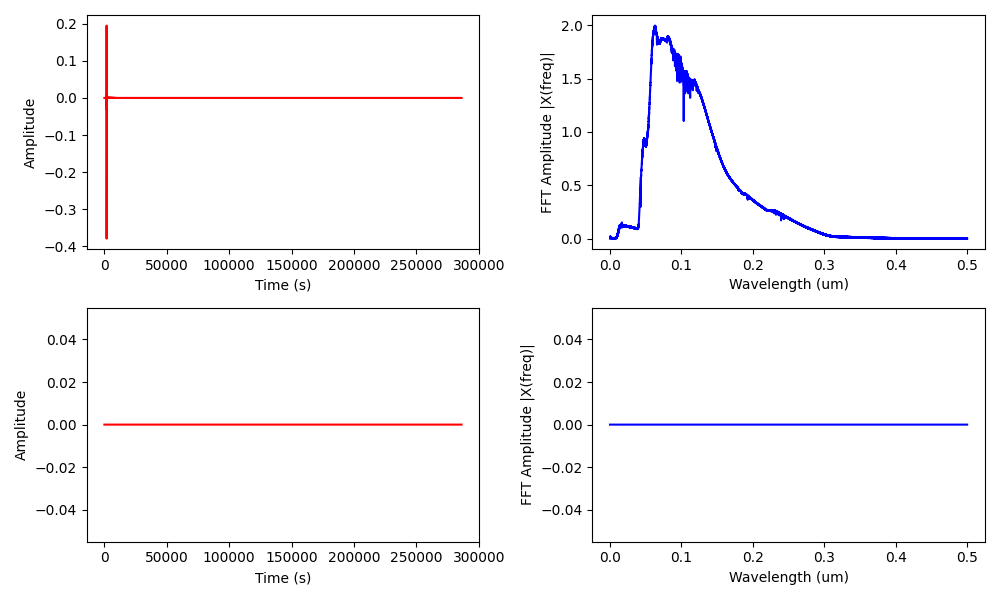

In [29]:
plt.close()
Y=2
x = namesspectra[Y]
print(x)
# get the sampling rate
sr = 1 
# Define the frequency range for the bandpass filter
low_freq = 1760  # Lower frequency cutoff
high_freq = 1800  # Upper frequency cutoff

df = pd.DataFrame()
df = pd.read_csv(path + '\\' + x, delimiter="\t", decimal=".", names = ['a', 'b'])
dfs = df.copy()
dfs.loc[(df['b'] > low_freq) & (df['b'] < high_freq), 'b'] = 0



sig_fft = fft(dfs['b'])
sig_fft_filtered = sig_fft.copy()
N = dfs['a'].shape[-1]
n = np.arange(N)
T = N/sr
freq = n/T

# print(yf)
sig_fft_filtered[(freq < low_freq) | (freq > high_freq)] = 0

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (10, 6))

plt.subplot(221)
plt.plot(df['a'], df['b'], 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(222)
plt.plot(f_oneside, np.abs(sig_fft[:n_oneside]), 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)

plt.subplot(223)
# plt.plot(df['a'], sig_fft_filtered, 'r')
plt.plot(dfs['a'], np.real(ifft(sig_fft_filtered)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(224)
plt.plot(f_oneside, np.abs(sig_fft_filtered[:n_oneside]), 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()


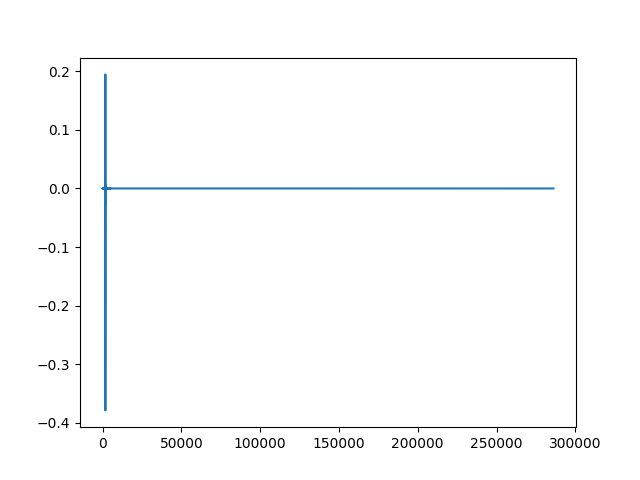

In [43]:
plt.close()
plt.plot(df['a'], df['b'])
plt.show()